# Create tables of LOWTRAN 7 model curves.
2022-05-31 H. Akitaya (PERC/CIT)

Kanata transmission: 2023-06-20 H. Akitaya

  * Original
    * Lowtran model curves (transmisson)を、モデルごと(2-6)、標高100m刻み・10nm刻みのastropy.Tables に書き出す。
  * This time
    * Kanata のcurveを書き出す. airmassを変える。sec(z) = 1.0, 1.2, 1.5, 2.0, 3.0

In [1]:
import os
import sys

In [2]:
import numpy as np

In [3]:
dirname = './kanata/'
if not os.path.isdir(dirname):
    os.makedirs(dirname)

In [4]:
!ls

abs_lambda_b.xy
atmospheric_transmittance_at_u_band_1.ipynb
ctioextinct.dat
kanata/
kpnoextinct.dat
l7_trans_curves/
lawtran_model_curve_tables-kanata.ipynb
lawtran_model_curve_tables.ipynb
lowtran_test_1.ipynb
mkoextinct.dat
sky_extinction_at_uh88.ipynb
specreduce_test_1.ipynb
tibet_transmittance_at_u_band_1.ipynb
transmittance_height.eps
transmittance_height.png
uband_height.eps
uband_height.png


In [51]:
# Wavelength range and resolution.
L1 = 200.0  # nm
L2 = 2500.0  # nm
DL = 10.0  # nm

In [52]:
wls = np.linspace(L1, L2, int((L2-L1)/DL)+1)

In [53]:
wls

array([ 200.,  210.,  220.,  230.,  240.,  250.,  260.,  270.,  280.,
        290.,  300.,  310.,  320.,  330.,  340.,  350.,  360.,  370.,
        380.,  390.,  400.,  410.,  420.,  430.,  440.,  450.,  460.,
        470.,  480.,  490.,  500.,  510.,  520.,  530.,  540.,  550.,
        560.,  570.,  580.,  590.,  600.,  610.,  620.,  630.,  640.,
        650.,  660.,  670.,  680.,  690.,  700.,  710.,  720.,  730.,
        740.,  750.,  760.,  770.,  780.,  790.,  800.,  810.,  820.,
        830.,  840.,  850.,  860.,  870.,  880.,  890.,  900.,  910.,
        920.,  930.,  940.,  950.,  960.,  970.,  980.,  990., 1000.,
       1010., 1020., 1030., 1040., 1050., 1060., 1070., 1080., 1090.,
       1100., 1110., 1120., 1130., 1140., 1150., 1160., 1170., 1180.,
       1190., 1200., 1210., 1220., 1230., 1240., 1250., 1260., 1270.,
       1280., 1290., 1300., 1310., 1320., 1330., 1340., 1350., 1360.,
       1370., 1380., 1390., 1400., 1410., 1420., 1430., 1440., 1450.,
       1460., 1470.,

In [54]:
# filename format.
fn_fmt = 'lt_trans_curve_kanata_{}.ecsv'

In [55]:
import lowtran

In [56]:
from astropy.table import Table

In [73]:
#altitudes = np.linspace(0, 6000, 61)  # 0-6000 m (100 m step.)
altitude = 511.2 /1000.0  # Kanata Ns focus. (km)

In [74]:
models = range(2, 7)

In [75]:
c1 = {
    'model': 2,  # Midlatitude Summer.
    'h1': altitude,  # Observer altitude. [km]
    'angle': 0.0,  # Zentih angle. [deg]
    'wlshort': L1,  # Shortest wavelength. [nm]
    'wllong': L2,  # Longest wavelength. [nm]
    'wlstep': DL,  # Wavelength step. [nm]
}

In [76]:
#from astropy.io import ascii

secz list

In [77]:
secz_list = [1.0, 1.2, 1.5, 2.0, 3.0]

In [78]:
zangles = [np.arccos(1/secz)*180.0/np.pi for secz in secz_list]

In [79]:
zangles

[0.0,
 33.55730976192071,
 48.189685104221404,
 60.00000000000001,
 70.52877936550931]

In [80]:
tr = lowtran.transmittance(c1)
wls = np.flipud(tr.coords['wavelength_nm'].values)

for model in models:
    sys.stdout.write('model: {} '.format(model))
    c1['model'] = model
    tbl = Table()
    tbl['wavelength'] = wls
    for secz in secz_list:
        c1['angle'] =   np.arccos(1/secz)*180.0/np.pi  # zenith angle.
        print(c1['angle'])
        tr = lowtran.transmittance(c1)
        print(tr)
        tbl.add_column(np.flipud(np.ndarray.flatten(tr['transmission'][0, :].values)), name=str(secz))
    print(dirname + '/' + fn_fmt.format(model))
    tbl.write(dirname + '/' + fn_fmt.format(model), overwrite=True)

model: 2 0.0
<xarray.Dataset>
Dimensions:        (wavelength_nm: 4601, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+03 2.494e+03 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.09055 ... 1.599...
    radiance       (time, wavelength_nm, angle_deg) float32 2.637e-09 ... 2.6...
    irradiance     (time, wavelength_nm, angle_deg) float32 1.121e-44 ... 1.1...
    pathscatter    (time, wavelength_nm, angle_deg) float32 -99.0 ... -99.0
33.55730976192071
<xarray.Dataset>
Dimensions:        (wavelength_nm: 4601, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+03 2.494e+03 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 33.56
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.0652 ... 3.321e-43
    radiance       (time, wavel

<xarray.Dataset>
Dimensions:        (wavelength_nm: 4601, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+03 2.494e+03 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 0.0
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.538 ... 7.165e-38
    radiance       (time, wavelength_nm, angle_deg) float32 1.716e-07 ... 1.7...
    irradiance     (time, wavelength_nm, angle_deg) float32 1.121e-44 ... 1.1...
    pathscatter    (time, wavelength_nm, angle_deg) float32 -99.0 ... -99.0
33.55730976192071
<xarray.Dataset>
Dimensions:        (wavelength_nm: 4601, angle_deg: 1, time: 1)
Coordinates:
  * wavelength_nm  (wavelength_nm) float32 2.5e+03 2.494e+03 ... 200.0 200.0
  * angle_deg      (angle_deg) float64 33.56
  * time           (time) object None
Data variables:
    transmission   (time, wavelength_nm, angle_deg) float32 0.499 ... 1.261e-43
    radiance       (time, wavelength_nm, angle

In [81]:
# tbl.show_in_notebook()

In [82]:
ls -alh kanata/

total 1452
drwxr-xr-x  2 akitaya  users   512B  6月 20 21:25 ./
drwxr-xr-x  5 akitaya  users   1.0K  6月 20 21:31 ../
-rw-r--r--  1 akitaya  users   288K  6月 20 21:31 lt_trans_curve_kanata_2.ecsv
-rw-r--r--  1 akitaya  users   285K  6月 20 21:31 lt_trans_curve_kanata_3.ecsv
-rw-r--r--  1 akitaya  users   288K  6月 20 21:31 lt_trans_curve_kanata_4.ecsv
-rw-r--r--  1 akitaya  users   285K  6月 20 21:31 lt_trans_curve_kanata_5.ecsv
-rw-r--r--  1 akitaya  users   287K  6月 20 21:31 lt_trans_curve_kanata_6.ecsv


## Sample for reading table files.

In [83]:
tbl_read = Table()

In [84]:
tbl_read.read(dirname + '/' + fn_fmt.format(5))

<Table length=4601>
wavelength      1.0           1.2         1.5        2.0        3.0    
 float32      float32       float32     float32    float32    float32  
---------- ------------- ------------- ---------- ---------- ----------
     200.0 7.1653654e-38      1.26e-43        0.0        0.0        0.0
 200.04001 2.1866048e-31 1.4550535e-36    3.4e-44        0.0        0.0
 200.08003      1.47e-43           0.0        0.0        0.0        0.0
 200.12007 1.0590874e-33  4.363296e-39        0.0        0.0        0.0
 200.16013 3.1912334e-29 3.3023307e-34 1.3793e-41        0.0        0.0
  200.2002 1.7021093e-37       3.2e-43        0.0        0.0        0.0
 200.24028 1.5914088e-32  8.321081e-38      1e-45        0.0        0.0
  200.2804  1.510972e-28 1.7898174e-33 8.9567e-41        0.0        0.0
 200.32051 3.9760707e-33  1.831803e-38        0.0        0.0        0.0
 200.36066 2.1526377e-32 1.1520123e-37      1e-45        0.0        0.0
       ...           ...           ...        ...        ...        ...
 2444.9878    0.78973925     0.7689762 0.74106705 0.70079106 0.63528854
 2450.9805     0.7595812    0.73640454 0.70542073  0.6610604  0.5898446
 2457.0024     0.7989392    0.77837515  0.7505712 0.71013963  0.6436796
 2463.0542     0.7954501     0.7743537 0.74580264 0.70424086  0.6358601
 2469.1357     0.7467063    0.72171354  0.6882223 0.64016074 0.56290287
 2475.2476     0.6903461     0.6613268 0.62289006  0.5686529 0.48383874
 2481.3894     0.6056891     0.5717943  0.5277472 0.46727946  0.3768613
 2487.5623     0.5240708     0.4866771 0.43904608 0.37553376  0.2849939
 2493.7656    0.51710886    0.47883126 0.43009365  0.3652012 0.27310464
    2500.0     0.5380351    0.49899152 0.44884267  0.3813588 0.28435424

## Plot sample.

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

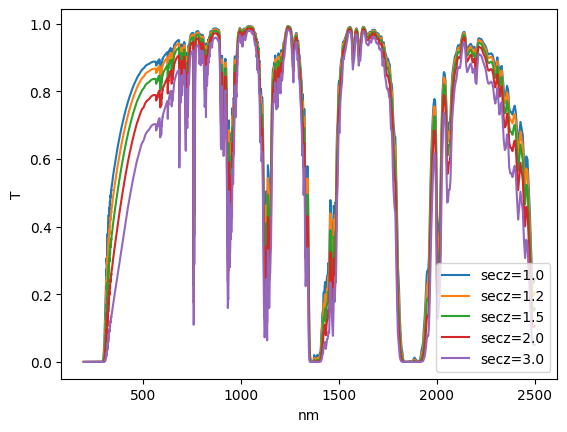

In [95]:
fig1, (ax) = plt.subplots(1, 1)
ax.set_xlabel('nm')
ax.set_ylabel('T')
for secz in secz_list:
    ax.plot(tbl['wavelength'], tbl[str(secz)], label='secz={}'.format(secz))
ax.legend()

## Interpolated function sample.

In [94]:
from scipy.interpolate import interp1d

In [22]:
tr_func = interp1d(tbl['wavelength'], tbl[str(int(altitude))])

In [23]:
float(tr_func(541.0))

0.8842760865192325

## Appendix

model_names

In [24]:
model_names = {
    2: 'Midlatitude Summer',
    3: 'Midlatitude Winter',
    4: 'Subarctic Summer',
    5: 'Subarctic Winter',
    6: '1976 US Standard',
}